In [1]:
from pythtb import W90 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
silicon = W90(r"silicon_w90", r"silicon")

In [3]:
# hard coded fermi level in eV
fermi_ev = 0.62285135e01

In [4]:
# all pair distances between the orbitals
print("Shells:\n", silicon.shells())

Shells:
 [ 0.    1.3   1.96  2.35  2.51  2.97  3.18  3.36  3.66  3.82  3.93  4.03
  4.29  4.48  4.57  4.61  4.83  4.97  5.12  5.29  5.32  5.4   5.42  5.48
  5.52  5.55  5.74  5.89  5.95  6.13  6.16  6.27  6.33  6.36  6.39  6.52
  6.55  6.61  6.63  6.74  6.89  7.07  7.1   7.22  7.25  7.39  7.44  7.56
  7.58  7.63  7.69  7.72  7.74  7.77  7.88  7.9   7.99  8.04  8.17  8.19
  8.27  8.31  8.32  8.34  8.36  8.47  8.49  8.53  8.55  8.59  8.74  8.78
  8.81  8.85  8.92  8.94  9.02  9.11  9.15  9.19  9.31  9.35  9.36  9.44
  9.46  9.53  9.55  9.57  9.64  9.72  9.79  9.81  9.88  9.92 10.04 10.29
 10.3  10.4  10.44 10.52 10.54 10.62 10.76 10.8  10.84 10.87 10.99 11.08
 11.18 11.21 11.26 11.29 11.38 11.46 11.72 11.75 12.23 12.24 12.43 13.08
 13.2  13.28 13.45]


Text(0, 0.5, '$\\log H$ (eV)')

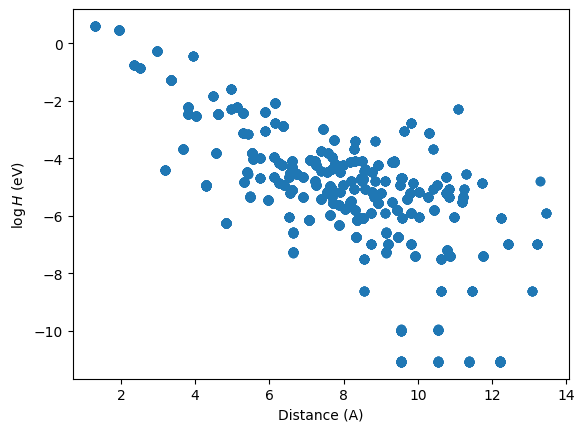

In [5]:
# plot hopping terms as a function of distance on a log scale
(dist, ham) = silicon.dist_hop()
fig, ax = plt.subplots()
ax.scatter(dist, np.log(np.abs(ham)))
ax.set_xlabel("Distance (A)")
ax.set_ylabel(r"$\log H$ (eV)")

In [6]:
# get tb model in which some small terms are ignored
my_model = silicon.model(
    zero_energy=fermi_ev,
    min_hopping_norm=0.01,
    max_distance=None,
    ignorable_imaginary_part=0.01,
)

Text(0, 0.5, 'Band energy (eV)')

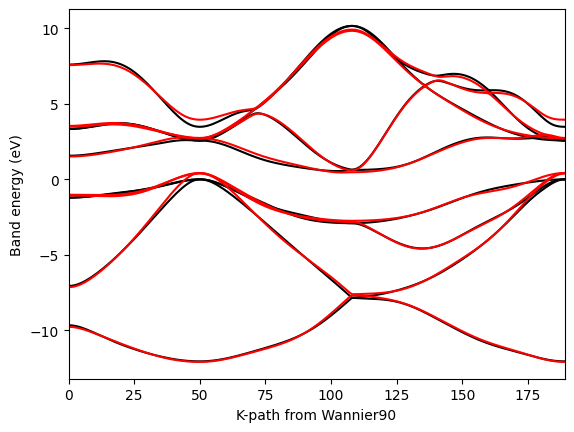

In [7]:
fig, ax = plt.subplots()
(w90_kpt, w90_evals) = silicon.w90_bands_consistency()

ax.plot(list(range(w90_evals.shape[0])), w90_evals - fermi_ev, "k-", zorder=-100)

# now interpolate from the model on the same path in k-space
int_evals = my_model.solve_ham(w90_kpt)
ax.plot(list(range(int_evals.shape[0])), int_evals, "r-", zorder=-50)

ax.set_xlim(0, int_evals.shape[0] - 1)
ax.set_xlabel("K-path from Wannier90")
ax.set_ylabel("Band energy (eV)")